# Cinsiyet Eşitsizliği Hi-Kod Projesi

***Türkiyedeki ve  dünyadaki kadın-erkek tam zamanlı istihdam oranının ve Türkiyedeki kadın yönetici oranının analizi.Türkiyedeki kadın yönetici oranının yıllara göre makine öğrenmesi ile tahmin etme***

---
* Öncelikle cvs dosyalarımızı yükledik ve gerekli kütüphanelerimizi import ettim.
head() fonksiyonu ile ilk 5 veriyi yazdırdım.




In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df=pd.read_csv("/content/GENDER_EMP_18042023012452038.csv")
df.head() 




,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,PRT,Portugal,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2011,2011,PC,Percentage,0,Units,NaN,NaN,57.1,NaN,NaN
1,ITA,Italy,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2005,2005,PC,Percentage,0,Units,NaN,NaN,38.8,NaN,NaN
2,FIN,Finland,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2012,2012,PC,Percentage,0,Units,NaN,NaN,69.7,NaN,NaN
3,FRA,France,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2005,2005,PC,Percentage,0,Units,NaN,NaN,49.3,NaN,NaN
4,NOR,Norway,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2012,2012,PC,Percentage,0,Units,NaN,NaN,71.3,NaN,NaN


* en son 5 veriyi yazdırmak için tail() fonksiyonunu kullandım

In [49]:
df.tail()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1198,ROU,Romania,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2017,2017,PC,Percentage,0,Units,NaN,NaN,53.7,NaN,NaN
1199,ROU,Romania,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2018,2018,PC,Percentage,0,Units,NaN,NaN,56.2,NaN,NaN
1200,ROU,Romania,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2019,2019,PC,Percentage,0,Units,NaN,NaN,56.6,NaN,NaN
1201,ROU,Romania,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2020,2020,PC,Percentage,0,Units,NaN,NaN,57.3,NaN,NaN
1202,ROU,Romania,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2021,2021,PC,Percentage,0,Units,NaN,NaN,56.8,NaN,NaN


*verimizin boyunu öğrenmek için shape fonksiyonunu kullandım*

In [50]:
df.shape 

(1203, 19)

* Verilerimin hangi tür ile oluşturulduguna ve null değerlerin sayısına bakmak için info fonksiyonu kullandım

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COU                    1203 non-null   object 
 1   Country                1203 non-null   object 
 2   IND                    1203 non-null   object 
 3   Indicator              1203 non-null   object 
 4   SEX                    1203 non-null   object 
 5   Sex                    1203 non-null   object 
 6   AGE                    1203 non-null   int64  
 7   Age Group              1203 non-null   object 
 8   TIME                   1203 non-null   int64  
 9   Time                   1203 non-null   int64  
 10  Unit Code              1203 non-null   object 
 11  Unit                   1203 non-null   object 
 12  PowerCode Code         1203 non-null   int64  
 13  PowerCode              1203 non-null   object 
 14  Reference Period Code  0 non-null      float64
 15  Refe

* describe () ile sayısal verilere sahip olan sütunların ortalaması , varyansı gibi değerleri elde ettim

In [5]:
df.describe() 

,AGE,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,1203.0,1203.000000,1203.000000,1203.0,0.0,0.0,1203.000000,0.0,0.0
mean,1564.0,2013.343308,2013.343308,0.0,NaN,NaN,64.247049,NaN,NaN
std,0.0,6.179727,6.179727,0.0,NaN,NaN,14.350213,NaN,NaN
min,1564.0,1995.000000,1995.000000,0.0,NaN,NaN,0.000000,NaN,NaN
25%,1564.0,2011.000000,2011.000000,0.0,NaN,NaN,53.850000,NaN,NaN
50%,1564.0,2014.000000,2014.000000,0.0,NaN,NaN,64.800000,NaN,NaN
75%,1564.0,2018.000000,2018.000000,0.0,NaN,NaN,74.850000,NaN,NaN
max,1564.0,2021.000000,2021.000000,0.0,NaN,NaN,109.600000,NaN,NaN


* sütunların isimlerini  bu şekilde öğreniyorum

In [6]:
df.columns


Index(['COU', 'Country', 'IND', 'Indicator', 'SEX', 'Sex', 'AGE', 'Age Group',
       'TIME', 'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

* Türkiye ile igili bilgilere ulaşmaya çalışıyorum

In [7]:
turkıye=df[df["Country"]=="Türkiye"]
turkıye

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
126,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2011,2011,PC,Percentage,0,Units,NaN,NaN,90.1,NaN,NaN
151,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2013,2013,PC,Percentage,0,Units,NaN,NaN,29.8,NaN,NaN
213,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2012,2012,PC,Percentage,0,Units,NaN,NaN,88.9,NaN,NaN
246,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2010,2010,PC,Percentage,0,Units,NaN,NaN,25.3,NaN,NaN
274,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2011,2011,PC,Percentage,0,Units,NaN,NaN,27.5,NaN,NaN
304,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2013,2013,PC,Percentage,0,Units,NaN,NaN,88.5,NaN,NaN
334,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2010,2010,PC,Percentage,0,Units,NaN,NaN,87.2,NaN,NaN
355,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2012,2012,PC,Percentage,0,Units,NaN,NaN,28.9,NaN,NaN
451,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2014,2014,PC,Percentage,0,Units,NaN,NaN,30.4,NaN,NaN
474,TUR,Türkiye,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2014,2014,PC,Percentage,0,Units,NaN,NaN,87.7,NaN,NaN


* Türkiye ile ilgili bilgileri kadın ve erkek olarak ayırdım ve yıllara göre istihdam oranını bulacağım.
* önce kadınların oranını buluyorum

In [51]:
kadın=turkıye[turkıye["Sex"]=="Women"] 
kadınzaman=kadın.sort_values("Time")
kadınzaman=kadınzaman["Time"]
kadınzaman=pd.DataFrame(kadınzaman)
kadınzaman



,Time
246,2010
274,2011
355,2012
151,2013
451,2014
590,2015
664,2016
742,2017
818,2018
896,2019


In [9]:
kadındeger=kadın["Value"]
kadındeger=pd.concat([kadınzaman,kadındeger],axis=1)
kadındeger 


,Time,Value
246,2010,25.3
274,2011,27.5
355,2012,28.9
151,2013,29.8
451,2014,30.4
590,2015,30.6
664,2016,31.9
742,2017,32.4
818,2018,33.2
896,2019,33.6


* erkeklerin verilerini buldum

In [10]:

erkek=turkıye[turkıye["Sex"]=="Men"]
erkek
 
erkekzaman=erkek.sort_values("Time")
erkekzaman=erkekzaman["Time"]
erkekzaman=pd.DataFrame(erkekzaman)
erkekzaman


,Time
334,2010
126,2011
213,2012
304,2013
474,2014
589,2015
663,2016
741,2017
817,2018
895,2019


In [52]:
erkekdeger=erkek["Value"]
erkekdeger=pd.concat([erkekzaman,erkekdeger],axis=1)
erkekdeger 


,Time,Value
334,2010,87.2
126,2011,90.1
213,2012,88.9
304,2013,88.5
474,2014,87.7
589,2015,87.3
663,2016,86.4
741,2017,86.7
817,2018,85.4
895,2019,81.5


* bulduğum kadın ve erkek verilerini merge () fonk. ile  birleştirdim

In [12]:
total = pd.merge(erkekdeger, kadındeger, on='Time')
total
total.columns=["Zaman","erkek istihdam oranı","kadın istihadam oranı"]
total


,Zaman,erkek istihdam oranı,kadın istihadam oranı
0,2010,87.2,25.3
1,2011,90.1,27.5
2,2012,88.9,28.9
3,2013,88.5,29.8
4,2014,87.7,30.4
5,2015,87.3,30.6
6,2016,86.4,31.9
7,2017,86.7,32.4
8,2018,85.4,33.2
9,2019,81.5,33.6


* Yıllara göre Türkiyedeki kadın yönetici oranını bulacağım

In [13]:
yöneticioran=pd.read_csv("/content/GENDER_EMP_18042023023307796.csv") 
yöneticioran.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2011,2011,PC,Percentage,0,Units,NaN,NaN,36.1,NaN,NaN
1,AUS,Australia,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,35.7,NaN,NaN
2,AUS,Australia,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2013,2013,PC,Percentage,0,Units,NaN,NaN,35.8,NaN,NaN
3,AUS,Australia,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2014,2014,PC,Percentage,0,Units,NaN,NaN,36.3,NaN,NaN
4,AUS,Australia,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2015,2015,PC,Percentage,0,Units,NaN,NaN,37.7,NaN,NaN


* Türkiyeyi bulduktan sonra verileri çekiyorum

In [53]:
yönetici=yöneticioran[yöneticioran["Country"]=="Türkiye"] 
yönetici

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
203,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2011,2011,PC,Percentage,0,Units,NaN,NaN,11.0,NaN,NaN
204,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,12.1,NaN,NaN
205,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2013,2013,PC,Percentage,0,Units,NaN,NaN,14.4,NaN,NaN
206,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2014,2014,PC,Percentage,0,Units,NaN,NaN,13.4,NaN,NaN
207,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2015,2015,PC,Percentage,0,Units,NaN,NaN,13.2,NaN,NaN
208,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2016,2016,PC,Percentage,0,Units,NaN,NaN,15.1,NaN,NaN
209,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2017,2017,PC,Percentage,0,Units,NaN,NaN,15.0,NaN,NaN
210,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2018,2018,PC,Percentage,0,Units,NaN,NaN,14.8,NaN,NaN
347,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2019,2019,PC,Percentage,0,Units,NaN,NaN,16.2,NaN,NaN
387,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2010,2010,PC,Percentage,0,Units,NaN,NaN,10.0,NaN,NaN


In [15]:
 yöneticizaman=yönetici.sort_values("Time") 
 yöneticizaman=yöneticizaman["Time"]
 yöneticizaman=pd.DataFrame(yöneticizaman)
 yöneticizaman

,Time
387,2010
203,2011
204,2012
205,2013
206,2014
207,2015
208,2016
209,2017
210,2018
347,2019


In [16]:
kadınyönetici=yönetici["Value"]
kadınyönetici=pd.DataFrame(kadınyönetici)
kadınyönetici



,Value
203,11.0
204,12.1
205,14.4
206,13.4
207,13.2
208,15.1
209,15.0
210,14.8
347,16.2
387,10.0


* Oranımı ve zamanı birleştirmek için concat() fonk. kullandım

In [17]:
Yonetici=pd.concat([kadınyönetici,yöneticizaman],axis=1)
Yonetici
Yonetici.columns=["Kadın yönetici oranı","Zaman"]
Yonetici

,Kadın yönetici oranı,Zaman
203,11.0,2011
204,12.1,2012
205,14.4,2013
206,13.4,2014
207,13.2,2015
208,15.1,2016
209,15.0,2017
210,14.8,2018
347,16.2,2019
387,10.0,2010


* Bulduğum kadın ve erkek verilerini plot bar grafiğinde karşılaştırdım

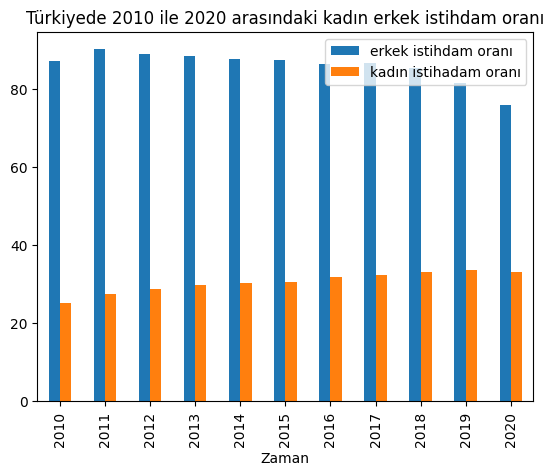

In [19]:
total.plot(x="Zaman", y=["erkek istihdam oranı","kadın istihadam oranı"], kind='bar',title="Türkiyede 2010 ile 2020 arasındaki kadın erkek istihdam oranı")
plt.show()

* Türkiyedeki kadın istihdam oranının yıllara göre değişiminin scatter ile görselleştirilmesi

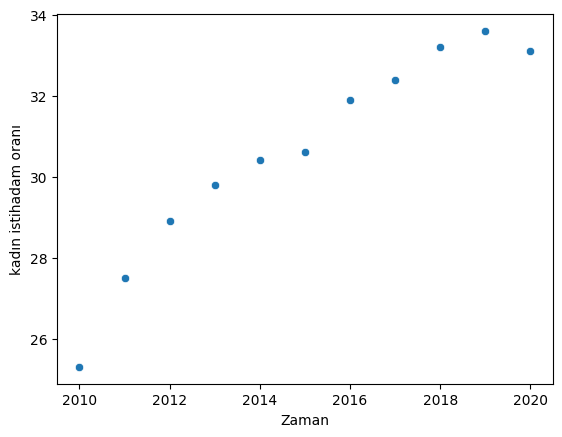

In [20]:
sns.scatterplot(x="Zaman",y="kadın istihadam oranı",data=total);

* Türkiyedeki kadın yönetici oranının yıllara göre değişimi scatter ile görselleştirilmesi 





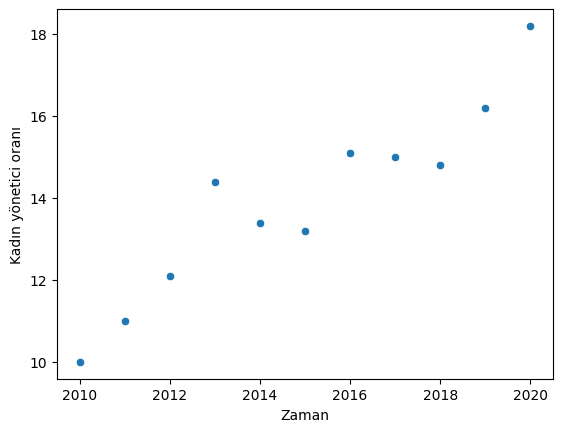

In [21]:
sns.scatterplot(x="Zaman",y="Kadın yönetici oranı",data=Yonetici);


* Tüm ülkelerdeki kadınların istihdam oranlarını buldum

In [54]:
dunyakadın=df[df["Sex"]=="Women"]
sütunlar = ['Country', 'Time', 'Value']
dunyakadın=dunyakadın[sütunlar]
dunyakadın.sort_values("Time")


,Country,Time,Value
195,Korea,1995,62.7
310,Belgium,1995,37.3
325,Netherlands,1995,33.3
248,Spain,1995,29.6
88,New Zealand,1995,47.8
...,...,...,...
1027,Netherlands,2021,47.2
1025,Mexico,2021,43.0
1023,Luxembourg,2021,55.7
1044,Türkiye,2021,30.1


* hangi yılların verileri alınmış ona baktım. Başlangıç ve bitiş yıllarını bulmak için

In [23]:
zaman=dunyakadın["Time"].unique() 
zaman

array([2011, 2005, 2012, 1995, 2013, 2000, 2010, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

* burada ülkeleri ayrı bir dataframede tuttum

In [24]:
ulkeler=dunyakadın["Country"].unique()
ulkeler

ulke=pd.DataFrame(ulkeler)


* burda ülkelerin 1995 ile 2021'e kadar olan istihdam oranlarını verdim 

In [25]:
ulkeveri=[]  #burda ülkelerin 1995 ile 2021 e kadar olan istihdam oranları verildi
for i in ulkeler:
  veri=dunyakadın[dunyakadın["Country"]==i]
  ortalama=veri["Value"].mean()
  ulkeveri.append(ortalama)


ulkeveri=pd.DataFrame(ulkeveri)
ulkeveri




,0
0,58.433333
1,38.857143
2,51.340000
3,51.972727
4,51.740000
5,53.250000
6,54.660000
7,58.160000
8,54.986667
9,59.638462


* dünyadaki kadınlar için olusan son tablo

In [26]:
result = pd.concat([ulke, ulkeveri], axis=1) ,
result.columns=["ülkeler","Value"]
result
result.at[32, 'ülkeler'] = "Turkey"
result

,ülkeler,Value
0,Portugal,58.433333
1,Italy,38.857143
2,France,51.340000
3,Australia,51.972727
4,Germany,51.740000
5,Poland,53.250000
6,Slovak Republic,54.660000
7,United States,58.160000
8,Denmark,54.986667
9,Czech Republic,59.638462


* ülkelerdeki erkek çalışma oranları 

In [27]:
dunyaerkek=df[df["Sex"]=="Men"]
sütunlar = ['Country', 'Time', 'Value']
dunyaerkek=dunyaerkek[sütunlar]
dunyaerkek.sort_values("Time")

,Country,Time,Value
267,Italy,1995,69.2
161,Mexico,1995,94.5
368,Belgium,1995,67.9
66,Israel,1995,88.7
96,Hungary,1995,64.3
...,...,...,...
1028,New Zealand,2021,86.0
1024,Mexico,2021,88.9
1135,Cyprus,2021,76.9
1020,Korea,2021,79.4


* ülkelerin 1995 ile 2021'e kadar olan istihdam oranları verildi(dünyadaki erkekler için)

In [28]:
ulkeerkekveri=[] 
for i in ulkeler:
  erkekveri=dunyaerkek[dunyaerkek["Country"]==i]
  ortalama=erkekveri["Value"].mean()
  ulkeerkekveri.append(ortalama)


ulkeerkekveri=pd.DataFrame(ulkeerkekveri)
ulkeerkekveri



,0
0,72.800000
1,67.760000
2,68.833333
3,79.100000
4,76.660000
5,73.128571
6,71.613333
7,75.980000
8,69.653333
9,81.776923


In [29]:
erkekresult = pd.concat([ulke, ulkeerkekveri], axis=1)
erkekresult.columns=["ülkeler","Value"]
erkekresult
erkekresult.at[32, 'ülkeler'] = "Turkey"
erkekresult




,ülkeler,Value
0,Portugal,72.800000
1,Italy,67.760000
2,France,68.833333
3,Australia,79.100000
4,Germany,76.660000
5,Poland,73.128571
6,Slovak Republic,71.613333
7,United States,75.980000
8,Denmark,69.653333
9,Czech Republic,81.776923


* kadın ve erkek verilerimi birleştirdim 

In [55]:
 
dünyatotal = pd.merge(erkekresult, result, on='ülkeler')
dünyatotal
dünyatotal.columns=["ülkeler","dünyadaki erkek istihdam oranı","dünyadaki kadın istihdam oranı"]
dünyatotal


,ülkeler,dünyadaki erkek istihdam oranı,dünyadaki kadın istihdam oranı
0,Portugal,72.800000,58.433333
1,Italy,67.760000,38.857143
2,France,68.833333,51.340000
3,Australia,79.100000,51.972727
4,Germany,76.660000,51.740000
5,Poland,73.128571,53.250000
6,Slovak Republic,71.613333,54.660000
7,United States,75.980000,58.160000
8,Denmark,69.653333,54.986667
9,Czech Republic,81.776923,59.638462


**VERİ GÖRSELLEŞTİRME**<BR>
**Dünyada ülkelere göre kadın istihdam oranı 1995-2021**

In [56]:
fig = px.choropleth(result, locations="ülkeler", locationmode="country names", color="Value",color_continuous_scale= "blues",
                    hover_name="ülkeler",range_color=[0,65],
                    projection="natural earth",title="Dünyada ülkelere göre kadın istihdam oranı 1995-2021 ")
fig.show()


* ülkelerin oranını bir de bar grafiğinde gösterdim

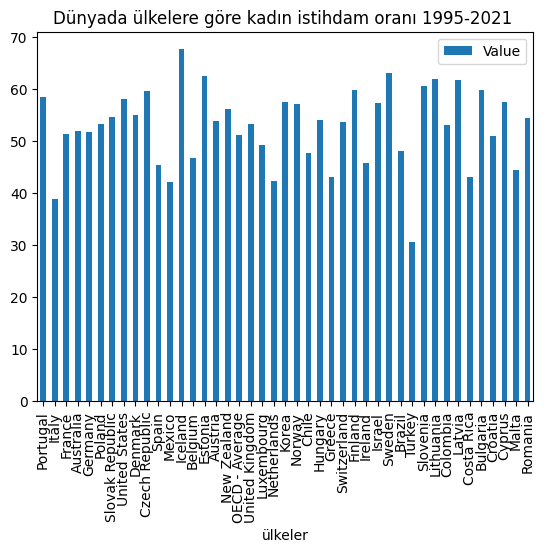

In [32]:
result.plot(x="ülkeler", y="Value", kind='bar',title="Dünyada ülkelere göre kadın istihdam oranı 1995-2021 ") #ülkelerin oranını bir de bar grafiğinde gösterdim
plt.show()

**Ülkelere göre dünyadaki kadın erkek istihdam oranları karşılaştırması**

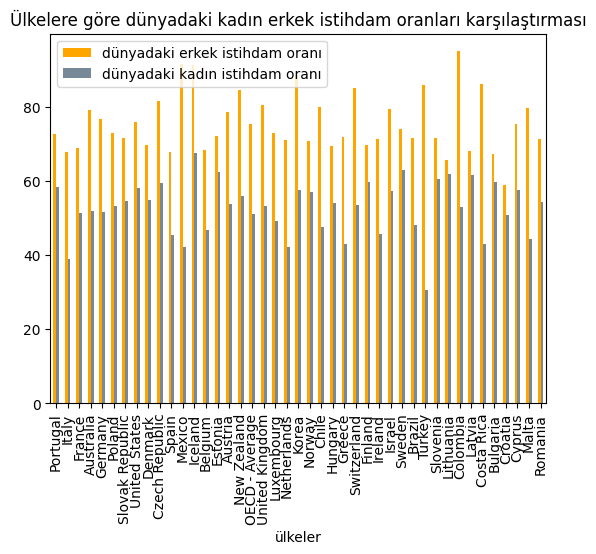

In [33]:
dünyatotal.plot(x="ülkeler", y=["dünyadaki erkek istihdam oranı","dünyadaki kadın istihdam oranı"], kind='bar',color=["orange","lightslategray"],title="Ülkelere göre dünyadaki kadın erkek istihdam oranları karşılaştırması")
plt.show()

* MAKİNE ÖĞRENMESİ İLE TÜRKİYEDEKİ KADIN YÖNETİCİ ORANINI TAHMİN ETME

In [34]:
makineveri=yönetici
makineveri



,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
203,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2011,2011,PC,Percentage,0,Units,NaN,NaN,11.0,NaN,NaN
204,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,12.1,NaN,NaN
205,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2013,2013,PC,Percentage,0,Units,NaN,NaN,14.4,NaN,NaN
206,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2014,2014,PC,Percentage,0,Units,NaN,NaN,13.4,NaN,NaN
207,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2015,2015,PC,Percentage,0,Units,NaN,NaN,13.2,NaN,NaN
208,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2016,2016,PC,Percentage,0,Units,NaN,NaN,15.1,NaN,NaN
209,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2017,2017,PC,Percentage,0,Units,NaN,NaN,15.0,NaN,NaN
210,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2018,2018,PC,Percentage,0,Units,NaN,NaN,14.8,NaN,NaN
347,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2019,2019,PC,Percentage,0,Units,NaN,NaN,16.2,NaN,NaN
387,TUR,Türkiye,EMP10NEW,Share of female managers,WOMEN,Women,TOTAL,Total,2010,2010,PC,Percentage,0,Units,NaN,NaN,10.0,NaN,NaN


In [75]:
makinezaman=makineveri["Time"].unique()
makinezaman
makinezamandf=pd.DataFrame(makinezaman)
makinezamandf


,0
0,2011
1,2012
2,2013
3,2014
4,2015
5,2016
6,2017
7,2018
8,2019
9,2010


* ilk beş verimle x ve y değerimi oluşturdum.  test ve train için verilerimi buldum.B1 VE B0 katsayılarımı buldum. 

In [74]:
X =makineveri[["Time"]].head()
y = makineveri[["Value"]].head()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print(reg_model.intercept_)
print(reg_model.coef_)

[-1134.985]
[[0.57]]


* Score ile modelimizin ne kadar doğru olduğunu ölçüyoruz. 1 ve 0 arasında değerler alıyor. 1 overfitting demek 0 ise underfitting demek 

In [73]:
reg_model.score(X_train, y_train)

0.8810847457627166

* Ortalama Hata Karesi (MSE), Ortalama Karekök Sapması (RMSE) ve Ortalama mutlak hata (MAE) buldum 

In [72]:
y_pred = reg_model.predict(X_test)
print("mse: ", mean_squared_error(y_test, y_pred))
print("rmse: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mae: ",  mean_absolute_error(y_test, y_pred))

mse:  3.900625000000181
rmse:  1.9750000000000458
mae:  1.9750000000000458


* oluşturduğum modeli görselleştirdim ve gerçek verilerimi modelimle birlikte gösterdim.(mavi noktalar gerçek değerlerim,kırmızı doğru modelim)

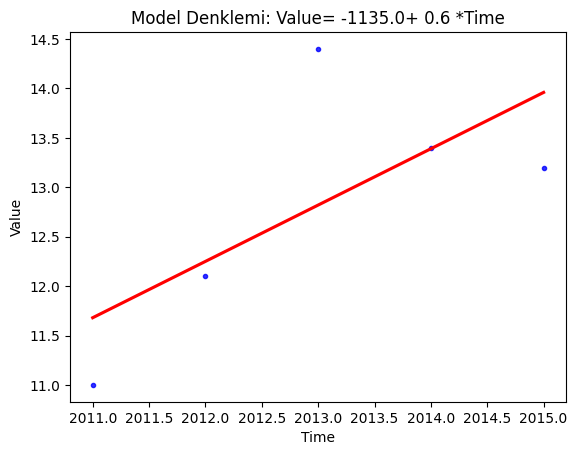

In [71]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},ci=False, color="r")
g.set_title(f"Model Denklemi: Value= {round(reg_model.intercept_[0],1)}+ {round(reg_model.coef_[0][0],1)} *Time")
g.set_xlabel("Time")
g.set_ylabel("Value")
plt.show()

* ilk 5 verimle , ilk 10 yıl tahmin ettim

In [70]:
onyıltahmin=[]
for zaman in makinezaman:
  tahmin=reg_model.predict([[zaman]])
  onyıltahmin.append(float(tahmin))

onyıltahmin


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/p

[11.285000000000082,
 11.855000000000018,
 12.424999999999955,
 12.995000000000118,
 13.565000000000055,
 14.134999999999991,
 14.704999999999927,
 15.275000000000091,
 15.845000000000027,
 10.714999999999918,
 16.414999999999964]

In [67]:
liste=onyıltahmin
liste
liste=pd.DataFrame(liste)
liste

,0
0,11.285
1,11.855
2,12.425
3,12.995
4,13.565
5,14.135
6,14.705
7,15.275
8,15.845
9,10.715


* iki verisetimi birleştirdim

In [66]:
mv=makineveri["Value"]
makinedata=pd.concat([liste,makinezamandf],axis=1)
makinedata.columns=["oran","Zaman"]
makinedata

,oran,Zaman
0,11.285,2011
1,11.855,2012
2,12.425,2013
3,12.995,2014
4,13.565,2015
5,14.135,2016
6,14.705,2017
7,15.275,2018
8,15.845,2019
9,10.715,2010


* Tahmin ettiğim değerlerle gerçek değerlerin karşılaştırılmasının görselleştirilmesi

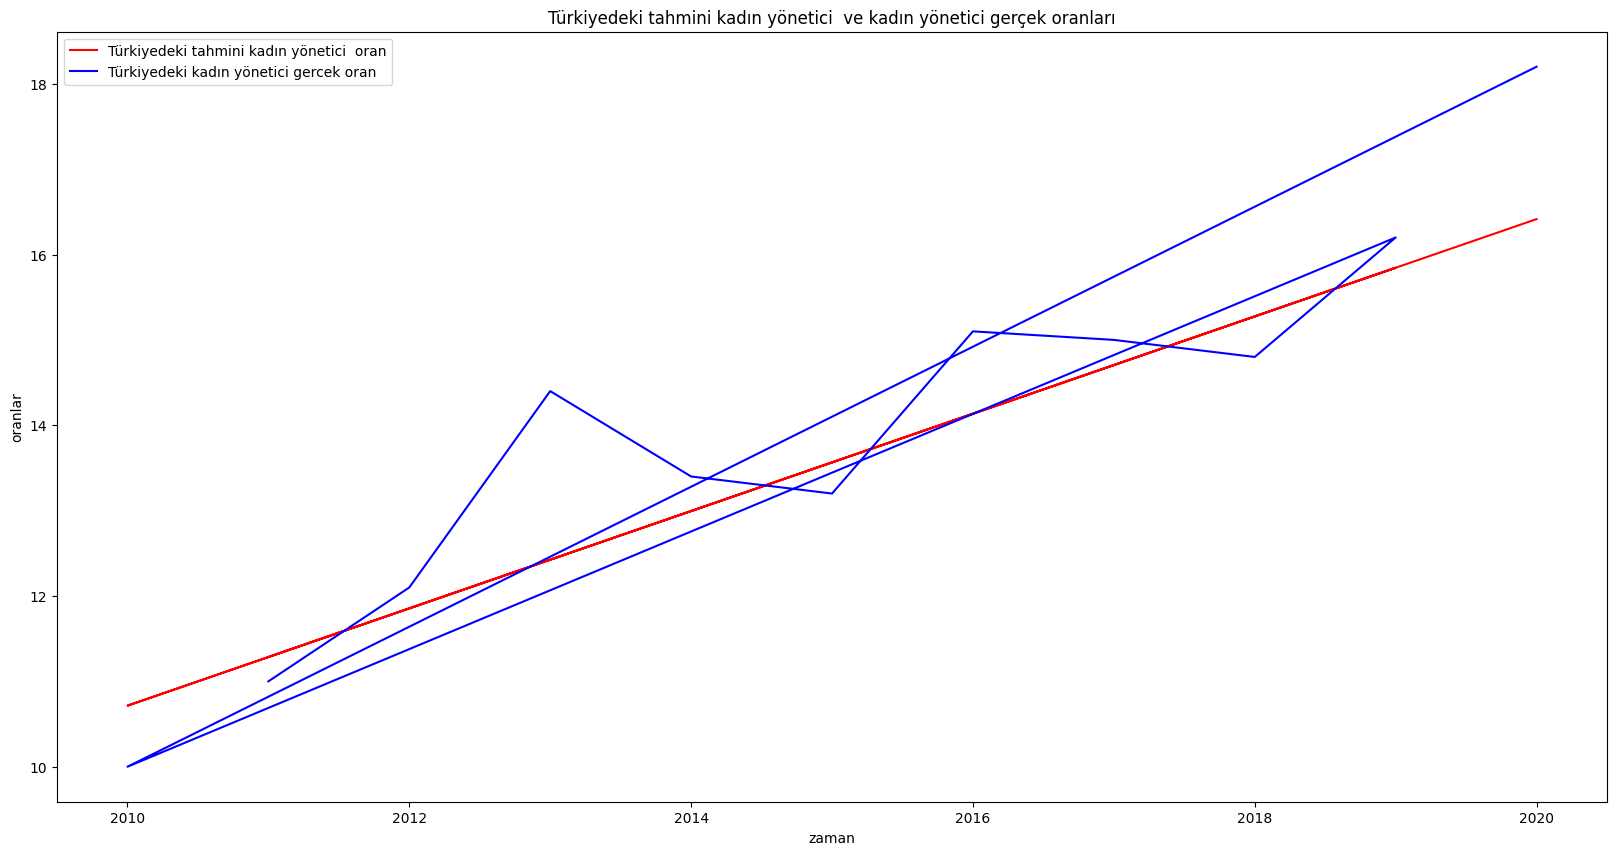

In [76]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(makinedata.Zaman,makinedata.oran,color="r", label="Türkiyedeki tahmini kadın yönetici  oran") 
ax.plot(Yonetici.Zaman,Yonetici["Kadın yönetici oranı"],color="blue", label="Türkiyedeki kadın yönetici gercek oran")
ax.set_xlabel("zaman")
ax.set_ylabel("oranlar")
ax.set_title("Türkiyedeki tahmini kadın yönetici  ve kadın yönetici gerçek oranları")
ax.legend()
plt.show()

* Türkiyedeki kadın yönetici gerçek oranı ve tahmin değerinin bar grafik ile görselleştirilmesi

In [77]:
total2=pd.merge(Yonetici,makinedata,on="Zaman")
total2.columns=["gerçek değerlerimiz","Zaman","tahmini değerlerimiz"]
total2

,gerçek değerlerimiz,Zaman,tahmini değerlerimiz
0,11.0,2011,11.285
1,12.1,2012,11.855
2,14.4,2013,12.425
3,13.4,2014,12.995
4,13.2,2015,13.565
5,15.1,2016,14.135
6,15.0,2017,14.705
7,14.8,2018,15.275
8,16.2,2019,15.845
9,10.0,2010,10.715


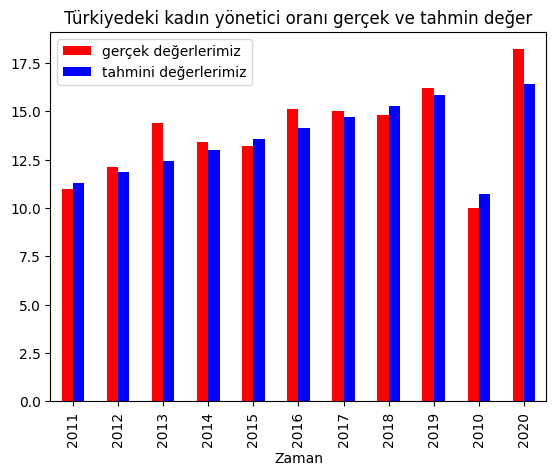

In [78]:
total2.plot(x="Zaman", y=["gerçek değerlerimiz","tahmini değerlerimiz"], kind='bar',color=["red","blue"],title="Türkiyedeki kadın yönetici oranı gerçek ve tahmin değer")
plt.show()

* Tüm ülkelerin kadın yönetici oranının görselleştirilmesi

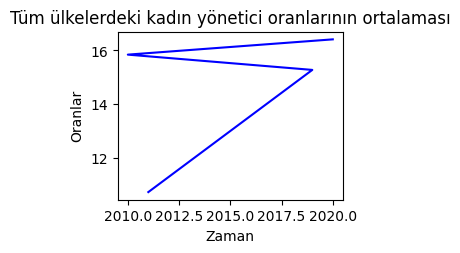

In [79]:
tüm_ülkelerin_ortak_tahminizamanları = makinedata.Zaman.unique()
tümülkelerin_ortak_tahmini_kadınoranları = makinedata.groupby("Zaman").oran.mean()

plt.subplot(2,2,2)
plt.plot(tüm_ülkelerin_ortak_tahminizamanları, tümülkelerin_ortak_tahmini_kadınoranları , color="blue")
plt.xlabel("Zaman")
plt.ylabel("Oranlar")
plt.title("Tüm ülkelerdeki kadın yönetici oranlarının ortalaması")
plt.show()


*Tüm ülkelerdeki kadın yönetici oranlarının ortalaması

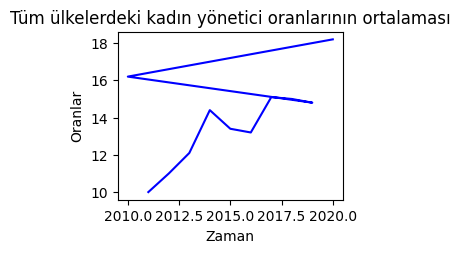

In [85]:
tüm_ülkelerin_ortakzamanları = Yonetici["Zaman"].unique()
tüm_ülkelerin_ortakzamanları = Yonetici.groupby("Zaman")["Kadın yönetici oranı"].mean()

plt.subplot(2,2,2)
plt.plot(tüm_ülkelerin_ortakzamanları, tümülkelerin_ortak_kadınoranları, color="blue")
plt.xlabel("Zaman")
plt.ylabel("Oranlar")
plt.title("Tüm ülkelerdeki kadın yönetici oranlarının ortalaması")
plt.show()

* Tüm dünyadaki kadın yönetici oranlarının yıllara göre genel ortalaması

Text(0.5, 1.0, 'Tüm ülkelerdeki kadın yönetici oranları ')

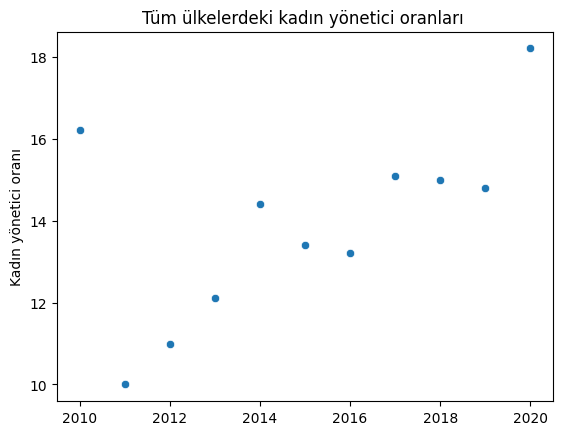

In [90]:
sns.scatterplot(x=tüm_ülkelerin_ortakzamanları,y=tümülkelerin_ortak_kadınoranları);
plt.title("Tüm ülkelerdeki kadın yönetici oranları ")

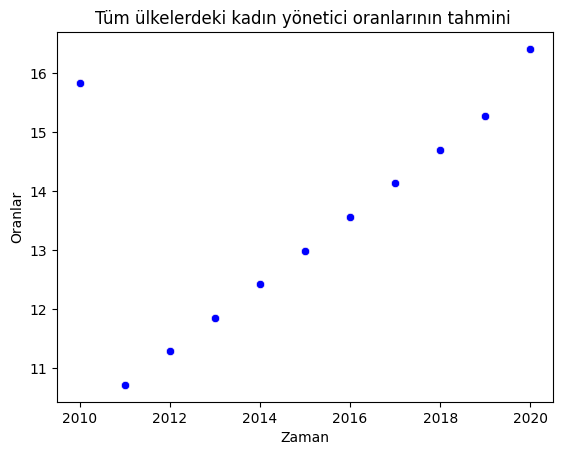

In [81]:
ax = sns.scatterplot(x=tüm_ülkelerin_ortak_tahminizamanları, y=tümülkelerin_ortak_tahmini_kadınoranları, color="red")
sns.scatterplot(x=tüm_ülkelerin_ortak_tahminizamanları, y=tümülkelerin_ortak_tahmini_kadınoranları, color="blue", ax=ax)
plt.xlabel("Zaman")
plt.ylabel("Oranlar")
plt.title("Tüm ülkelerdeki kadın yönetici oranlarının tahmini ")
plt.show()

* oluşturduğum modelin tahmin ettiği Türkiyedeki kadın yönetici oranı ile gerçek oranın karşılaştırılması.

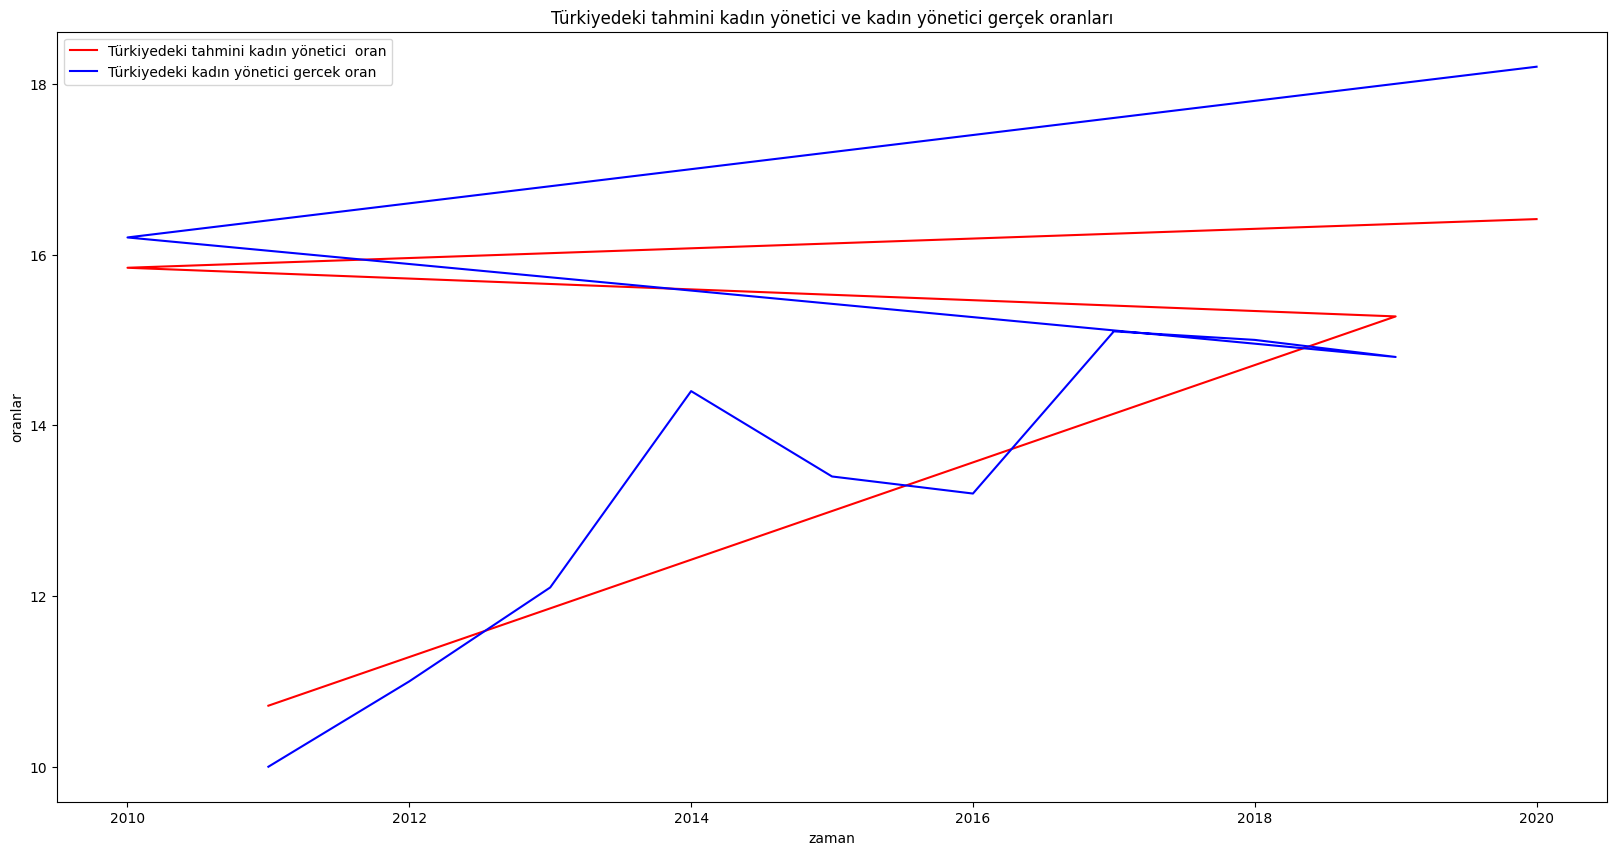

In [92]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(tüm_ülkelerin_ortak_tahminizamanları,tümülkelerin_ortak_tahmini_kadınoranları,color="r", label="Türkiyedeki tahmini kadın yönetici  oran") 
ax.plot(tüm_ülkelerin_ortakzamanları,tümülkelerin_ortak_kadınoranları,color="blue", label="Türkiyedeki kadın yönetici gercek oran")
ax.set_xlabel("zaman")
ax.set_ylabel("oranlar")
ax.set_title("Türkiyedeki tahmini kadın yönetici ve kadın yönetici gerçek oranları")
ax.legend()
plt.show()